In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from io import StringIO
from IPython.display import Image, display
import pydotplus

%matplotlib inline 
sns.set()

In [128]:
test_df = pd.read_csv('./CSV/titanic_test.csv')
train_df = pd.read_csv('./CSV/titanic_train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


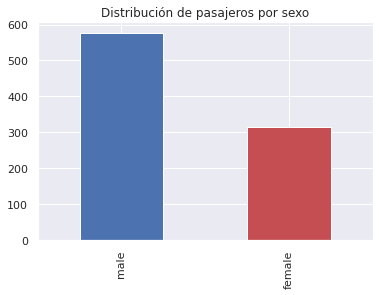

In [130]:
train_df.Sex.value_counts().plot(kind='bar', color=['b', 'r'])
plt.title('Distribución de pasajeros por sexo')
plt.show()

Text(0.5, 1.0, 'Distribucion de sobrevivientes')

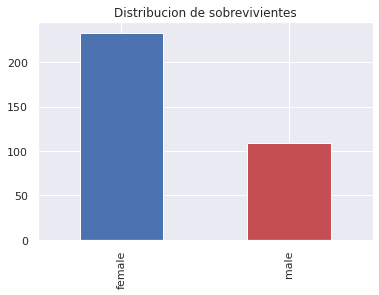

In [131]:
train_df[(train_df.Survived == 1)].Sex.value_counts().plot(kind = 'bar', 
        color = ['b' , 'r'])
plt.title('Distribucion de sobrevivientes')

In [132]:
label_encoder = preprocessing.LabelEncoder()

encoder_sex = label_encoder.fit_transform(train_df['Sex'])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [133]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [134]:
train_predictors = train_df.drop(['PassengerId', 'Survived', 'Name', 
                                    'Ticket', 'Cabin'], axis = 1)

categorical_cols = [cname for cname in train_predictors.columns if
                    train_predictors[cname].nunique() < 10 and
                    train_predictors[cname].dtype == 'object']

In [135]:
numeric_cols = [cname for cname in train_predictors.columns if
                train_predictors[cname].dtype in ['int64', 'float64']]


In [136]:
my_cols = categorical_cols + numeric_cols 
train_predictors = train_predictors[my_cols]

In [137]:
dummy_encode_train_predictors = pd.get_dummies(train_predictors)

In [138]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [139]:
y_target = train_df['Survived'].values
x_features_one = dummy_encode_train_predictors.values

In [140]:
x_train, x_validation, y_train, y_validation = train_test_split(x_features_one, 
                       y_target, test_size = 0.25, random_state = 1)

In [141]:
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_features_one, y_target)

In [142]:
tree_one_accuracy = round(tree_one.score(x_features_one, y_target), 4)
print('Accuracy: %0.4f' %(tree_one_accuracy))

Accuracy: 0.9798


In [143]:
# x_train , x_test, y_train , y_test =  train_test_split(x_features_one, y_target, test_size= .25, random_state=1)
# tree_one = tree.DecisionTreeClassifier()
# tree_one = tree_one.fit(x_train,y_train)
# tree_one_accuracy = round(tree_one.score(x_test,y_test), 4)
# tree_one_accuracy

In [147]:
out = StringIO()
tree.export_graphviz(tree_one, out_file = out)

graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('./titanic.png')

True